## Análisis del Desempleo del Primer Trimestre 2020:

### 1. Obtención de los Datos:
    - Abrir y Explorar los Datos de la Población Ocupada por Actividad Económica
---
    
### 2. Desarrollo:

In [ ]:
# Importando Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Abrimos archivos de datos csv
df = pd.read_csv('../Datos/Poblacion_Ocupada_Actividad_Economica.csv', encoding = "ISO-8859-1", engine='python')
df

,Periodo,Entidad_Federativa,Sexo,Grupo_edad,Actividad_economica,Numero_personas
0,20050301,Aguascalientes,Hombre,15 A 24 AÑOS,"Agricultura, Ganadería, Silvicultura, Caza y P...",4284
1,20050301,Aguascalientes,Hombre,15 A 24 AÑOS,Industria Extractiva y de la Electricidad,179
2,20050301,Aguascalientes,Hombre,15 A 24 AÑOS,Industria Manufacturera,16803
3,20050301,Aguascalientes,Hombre,15 A 24 AÑOS,Construcción,10503
4,20050301,Aguascalientes,Hombre,15 A 24 AÑOS,Comercio,10323
...,...,...,...,...,...,...
183489,20200301,Nacional,Mujer,NO ESPECIFICADO,"Servicios Profesionales, Financieros y Corpora...",2594
183490,20200301,Nacional,Mujer,NO ESPECIFICADO,Servicios Sociales,1517
183491,20200301,Nacional,Mujer,NO ESPECIFICADO,Servicios Diversos,1742
183492,20200301,Nacional,Mujer,NO ESPECIFICADO,Gobierno y Organismos Internacionales,1242


In [3]:
# Ver las dimensiones del Dataframe
df.shape

(183494, 6)

In [4]:
# Los tipos de datos que contiene
df.dtypes

Periodo                 int64
Entidad_Federativa     object
Sexo                   object
Grupo_edad             object
Actividad_economica    object
Numero_personas         int64
dtype: object

In [5]:
# Validaciones (Es null)
df.isna()

,Periodo,Entidad_Federativa,Sexo,Grupo_edad,Actividad_economica,Numero_personas
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
183489,False,False,False,False,False,False
183490,False,False,False,False,False,False
183491,False,False,False,False,False,False
183492,False,False,False,False,False,False


In [ ]:
#Después, podemos contar cuántos 'NaNs' existen usando la agregación 'sum', que suma '1' por cada 'True' y '0' por cada 'False:

In [6]:
df.isna().sum(axis=0)
df.isna().sum()

Periodo                0
Entidad_Federativa     0
Sexo                   0
Grupo_edad             0
Actividad_economica    0
Numero_personas        0
dtype: int64

In [7]:
df.isna().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
183489    0
183490    0
183491    0
183492    0
183493    0
Length: 183494, dtype: int64

In [8]:
df.dtypes

Periodo                 int64
Entidad_Federativa     object
Sexo                   object
Grupo_edad             object
Actividad_economica    object
Numero_personas         int64
dtype: object

In [9]:
# Tomo el mismo periodo pero del año pasado
df_2019 = df[df['Periodo'] == 20190301]
df_2019.head()
df_2020 = df[df['Periodo'] == 20200301]
df_2020.head()

df_periodos = df[df['Periodo'] > 20190000]
df_periodos.groupby(['Periodo']).sum().sort_values('Numero_personas', ascending = False)
# Quita los periodos restantes 2019
df_periodos = df_periodos.drop(df_periodos[df_periodos['Periodo'] == 20190601].index)
df_periodos = df_periodos.drop(df_periodos[df_periodos['Periodo'] == 20190901].index)
df_periodos = df_periodos.drop(df_periodos[df_periodos['Periodo'] == 20191201].index)
df_periodos.groupby(['Periodo']).sum().sort_values('Numero_personas', ascending = False)
df_periodos

,Periodo,Entidad_Federativa,Sexo,Grupo_edad,Actividad_economica,Numero_personas
161864,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,"Agricultura, Ganadería, Silvicultura, Caza y P...",3752
161865,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,Industria Extractiva y de la Electricidad,365
161866,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,Industria Manufacturera,22322
161867,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,Construcción,10494
161868,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,Comercio,12373
...,...,...,...,...,...,...
183489,20200301,Nacional,Mujer,NO ESPECIFICADO,"Servicios Profesionales, Financieros y Corpora...",2594
183490,20200301,Nacional,Mujer,NO ESPECIFICADO,Servicios Sociales,1517
183491,20200301,Nacional,Mujer,NO ESPECIFICADO,Servicios Diversos,1742
183492,20200301,Nacional,Mujer,NO ESPECIFICADO,Gobierno y Organismos Internacionales,1242


In [135]:
## Ordeno de forma descendente los datos y solo considero las 5 primeras entidades
df_periodos.sort_values('Numero_personas',ascending = False).head(5)
# Obtiene df Nacional
df_periodos_nacional = df_periodos[df_periodos['Entidad_Federativa'] == 'Nacional']
# Obtiene df Entidad
df_periodo_entidad = df_periodos.drop(df_periodos[df_periodos['Entidad_Federativa'] == 'Nacional'].index)
df_periodo_entidad


,Periodo,Entidad_Federativa,Sexo,Grupo_edad,Actividad_economica,Numero_personas
161864,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,"Agricultura, Ganadería, Silvicultura, Caza y P...",3752
161865,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,Industria Extractiva y de la Electricidad,365
161866,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,Industria Manufacturera,22322
161867,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,Construcción,10494
161868,20190301,Aguascalientes,Hombre,15 A 24 AÑOS,Comercio,12373
...,...,...,...,...,...,...
176529,20200301,Zacatecas,Mujer,65 AÑOS Y MAS,"Servicios Profesionales, Financieros y Corpora...",33
176530,20200301,Zacatecas,Mujer,65 AÑOS Y MAS,Servicios Sociales,580
176531,20200301,Zacatecas,Mujer,65 AÑOS Y MAS,Servicios Diversos,2985
176532,20200301,Zacatecas,Mujer,65 AÑOS Y MAS,Gobierno y Organismos Internacionales,400


### 3. Iniando con Visualización:
    - Graficar los Periodos para ver los datos de forma General
---

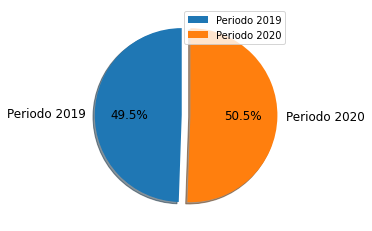

In [136]:
#Representación Gráfica de los dos Periodos
df_periodos_gr = df_periodo_entidad.groupby(['Periodo']).sum()#.sort_values('Numero_personas', ascending = False)
df_periodos_gr
x_values = df_periodo_entidad['Periodo'].unique().tolist()
x_values
y_values = df_periodos_gr['Numero_personas'].unique().tolist()
max(y_values)
len(y_values)

desfase = (0, 0.1)
plt.pie(y_values, labels=['Periodo 2019','Periodo 2020'] ,shadow=True ,explode=desfase ,autopct='%1.1f%%', startangle=90,
       labeldistance=1.1, textprops={'fontsize': 12}) #, wedgeprops = {'linewidth': 6}
plt.legend()
plt.show()
plt.savefig('Periodos.jpg')
plt.close('all')

In [168]:
# Análisis de Datos General Número de Personas por Periodo-Entidades
df_periodos_gr = df_periodo_entidad.groupby(['Entidad_Federativa','Periodo']).sum().sort_values(['Numero_personas'], ascending = False)
df_periodos_gr
# Número de Personas ocupadas por Entidad y Periodo
df_periodos_gr = df_periodos_gr.unstack()
df_periodos_gr

Numero_personas         
Periodo                    20190301 20200301
Entidad_Federativa                          
Aguascalientes               562439   583762
Baja California             1684852  1687966
Baja California Sur          415868   434348
Campeche                     414441   435961
Chiapas                     1928575  2068483
Chihuahua                   1644579  1717680
Ciudad de México            4246706  4207307
Coahuila                    1313037  1318686
Colima                       377518   384955
Durango                      768576   764521
Estado de México            7558731  7689225
Guanajuato                  2488257  2525501
Guerrero                    1473675  1537120
Hidalgo                     1280819  1288481
Jalisco                     3757440  3778375
Michoacán                   2034881  2074927
Morelos                      853043   873059
Nayarit                      608394   618344
Nuevo León                  2418796  2514056
Oaxaca                      1739316  1766690
Puebla                      2812844  2847348
Queretaro                    846631   893666
Quintana Roo                 864429   851473
San Luis Potosí             1188616  1230552
Sinaloa                     1348445  1391542
Sonora                      1394667  1430748
Tabasco                      936981  1031968
Tamaulipas                  1640978  1646601
Tlaxcala                     585757   594706
Veracruz                    3265254  3431708
Yucatán                     1073627  1086089
Zacatecas                    624094   646456

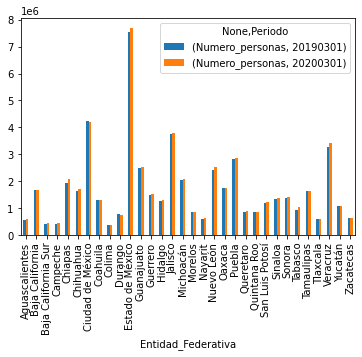

In [170]:
df_periodos_gr.plot(kind="bar");

In [177]:
# Se filtran las Entidades con Mayor Población Ocupada
df_periodos_edos = df_periodos[df_periodos['Entidad_Federativa'].isin(['Estado de México','Ciudad de México','Jalisco','Veracruz'])]
#df_periodos_gr = df_grouped[df_grouped['sport'].isin(['Basketball', 'Volleyball', 'Football', 'Baseball'])]
df_periodos_edos

,Periodo,Entidad_Federativa,Sexo,Grupo_edad,Actividad_economica,Numero_personas
162404,20190301,Ciudad de México,Hombre,15 A 24 AÑOS,"Agricultura, Ganadería, Silvicultura, Caza y P...",3146
162405,20190301,Ciudad de México,Hombre,15 A 24 AÑOS,Industria Manufacturera,28297
162406,20190301,Ciudad de México,Hombre,15 A 24 AÑOS,Construcción,28947
162407,20190301,Ciudad de México,Hombre,15 A 24 AÑOS,Comercio,77573
162408,20190301,Ciudad de México,Hombre,15 A 24 AÑOS,Restaurantes y Servicios de Alojamiento,43141
...,...,...,...,...,...,...
176346,20200301,Veracruz,Mujer,65 AÑOS Y MAS,Gobierno y Organismos Internacionales,2682
176347,20200301,Veracruz,Mujer,NO ESPECIFICADO,Comercio,55
176348,20200301,Veracruz,Mujer,NO ESPECIFICADO,"Transportes, Comunicaciones, Correo y Almacena...",137
176349,20200301,Veracruz,Mujer,NO ESPECIFICADO,Servicios Diversos,53


In [186]:
# Se obtienen las Actividades que tuvieron mayor variación
df_periodos_activ = df_periodos_edos.groupby(['Periodo','Entidad_Federativa','Actividad_economica']).sum()
df_periodos_activ

Numero_personas
Periodo  Entidad_Federativa Actividad_economica                                       
20200301 Estado de México   Comercio                                           1869947
20190301 Estado de México   Comercio                                           1639660
                            Industria Manufacturera                            1366460
20200301 Estado de México   Industria Manufacturera                            1262215
20190301 Ciudad de México   Comercio                                            901069
...                                                                                ...
20200301 Jalisco            Industria Extractiva y de la Electricidad            13833
20190301 Jalisco            Industria Extractiva y de la Electricidad            11210
                            No Especificado                                      10700
20200301 Veracruz           No Especificado                                       9554
20190301 Veracruz           No Especificado                                       6114

[96 rows x 1 columns]

In [238]:
df_periodos_activ_cdmx = df_periodos_edos[df_periodos_edos['Entidad_Federativa'].isin(['Ciudad de México'])].sort_values(['Actividad_economica','Numero_personas'], ascending = False)
df_periodos_activ_cdmx = df_periodos_activ_cdmx.drop(columns=['Grupo_edad','Sexo'])
df_periodos_activ_cdmx = df_periodos_activ_cdmx.groupby(['Periodo','Entidad_Federativa','Actividad_economica']).sum().sort_values(['Actividad_economica','Numero_personas'], ascending = False)
df_periodos_activ_cdmx.groupby(['Actividad_economica','Periodo']).agg({'Numero_personas': ['mean', 'min', 'max']})
df_periodos_activ_cdmx.groupby(['Periodo','Entidad_Federativa','Actividad_economica']).sum().sort_values(['Numero_personas','Actividad_economica'], ascending = False)
df_periodos_activ_cdmx = df_periodos_activ_cdmx.unstack(0)
df_periodos_activ_cdmx

Numero_personas  \
Periodo                                                                      20190301   
Entidad_Federativa Actividad_economica                                                  
Ciudad de México   Agricultura, Ganadería, Silvicultura, Caza y Pesca           19953   
                   Comercio                                                    901069   
                   Construcción                                                256215   
                   Gobierno y Organismos Internacionales                       284073   
                   Industria Extractiva y de la Electricidad                    23499   
                   Industria Manufacturera                                     406496   
                   No Especificado                                              21129   
                   Restaurantes y Servicios de Alojamiento                     323455   
                   Servicios Diversos                                          535266   
                   Servicios Profesionales, Financieros y Corporat...          620385   
                   Servicios Sociales                                          461931   
                   Transportes, Comunicaciones, Correo y Almacenam...          393235   

                                                                                
Periodo                                                               20200301  
Entidad_Federativa Actividad_economica                                          
Ciudad de México   Agricultura, Ganadería, Silvicultura, Caza y Pesca    16694  
                   Comercio                                             818970  
                   Construcción                                         237700  
                   Gobierno y Organismos Internacionales                285514  
                   Industria Extractiva y de la Electricidad             15468  
                   Industria Manufacturera                              443851  
                   No Especificado                                       20137  
                   Restaurantes y Servicios de Alojamiento              322802  
                   Servicios Diversos                                   516982  
                   Servicios Profesionales, Financieros y Corporat...   668447  
                   Servicios Sociales                                   525961  
                   Transportes, Comunicaciones, Correo y Almacenam...   334781

<AxesSubplot:xlabel='Entidad_Federativa,Actividad_economica'>

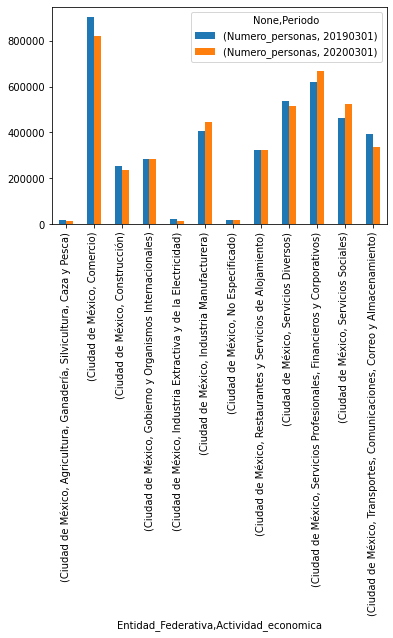

In [241]:
df_periodos_activ_cdmx.plot(kind="bar")

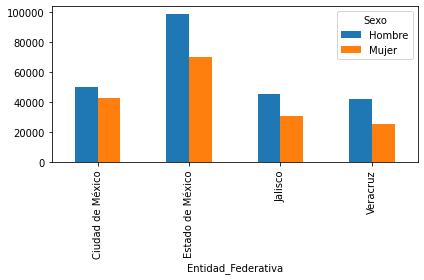

In [242]:
#df_2a[df_201901 & df_202001]
df_202001_edos_grupo = df_periodos_edos.groupby(['Entidad_Federativa', 'Sexo']).mean()["Numero_personas"].unstack()
# genera el gráfico:
df_202001_edos_grupo.plot(kind="bar")
plt.tight_layout()  # tip(!)